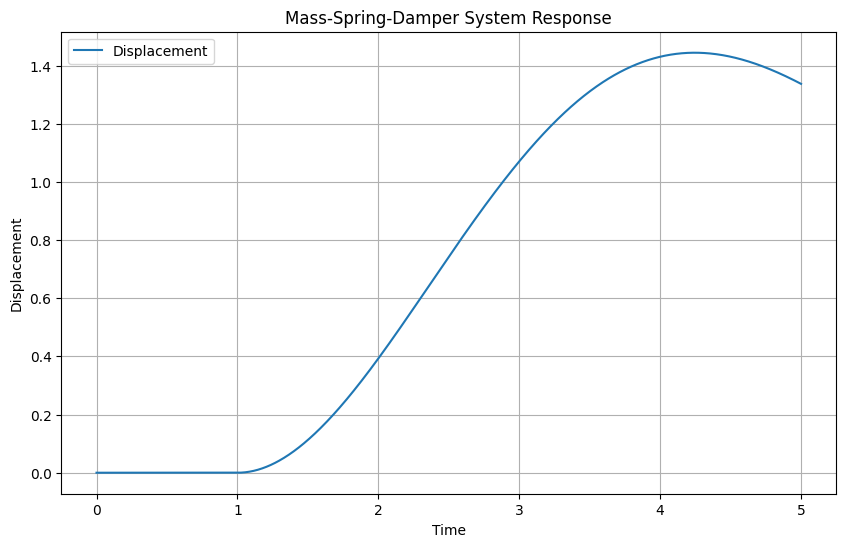

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the mass-spring-damper system dynamics
def mass_spring_damper(t, y, m, c, k, F):
    x, v = y
    dxdt = v
    dvdt = (F(t) - c * v - k * x) / m
    return [dxdt, dvdt]

# System parameters
m = 1.0  # Mass
c = 0.5  # Damping coefficient
k = 1.0  # Spring constant

# External force function (step input at t=1)
def external_force(t):
    return 1.0 if t >= 1 else 0.0

# Initial conditions
y0 = [0.0, 0.0]  # Initial displacement and velocity

# Time span
t_span = [0, 5]

# Solve the differential equation using solve_ivp
sol = solve_ivp(lambda t, y: mass_spring_damper(t, y, m, c, k, external_force), t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Displacement')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Mass-Spring-Damper System Response')
plt.legend()
plt.grid(True)
plt.show()